# Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [32]:
df = pd.read_csv('Iris.csv')

In [33]:
df

,Id,sep-len,sep-wid,pet-len,pet-wid,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
df = df.drop(columns='Id')

In [35]:
df.head()

,sep-len,sep-wid,pet-len,pet-wid,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sep-len  150 non-null    float64
 1   sep-wid  150 non-null    float64
 2   pet-len  150 non-null    float64
 3   pet-wid  150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
df.isnull().sum()

sep-len    0
sep-wid    0
pet-len    0
pet-wid    0
Species    0
dtype: int64

In [38]:
df.describe()

,sep-len,sep-wid,pet-len,pet-wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [40]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Exploratory Data Analysis

<AxesSubplot: xlabel='sep-len', ylabel='sep-wid'>

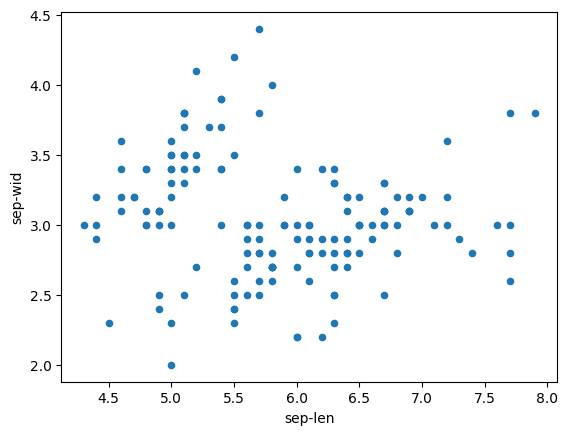

In [41]:
df.plot(kind='scatter',x='sep-len',y='sep-wid')

<AxesSubplot: xlabel='pet-len', ylabel='pet-wid'>

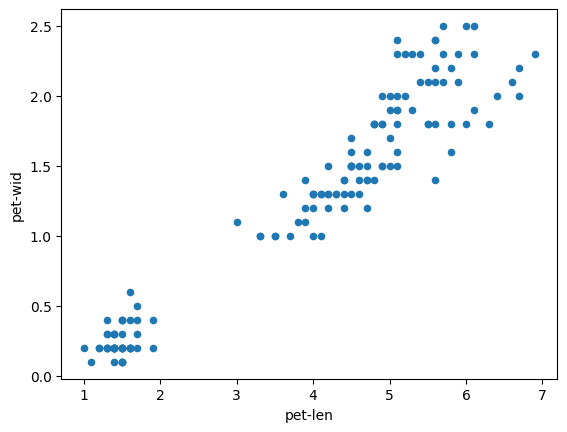

In [42]:
df.plot(kind='scatter',x='pet-len',y='pet-wid')

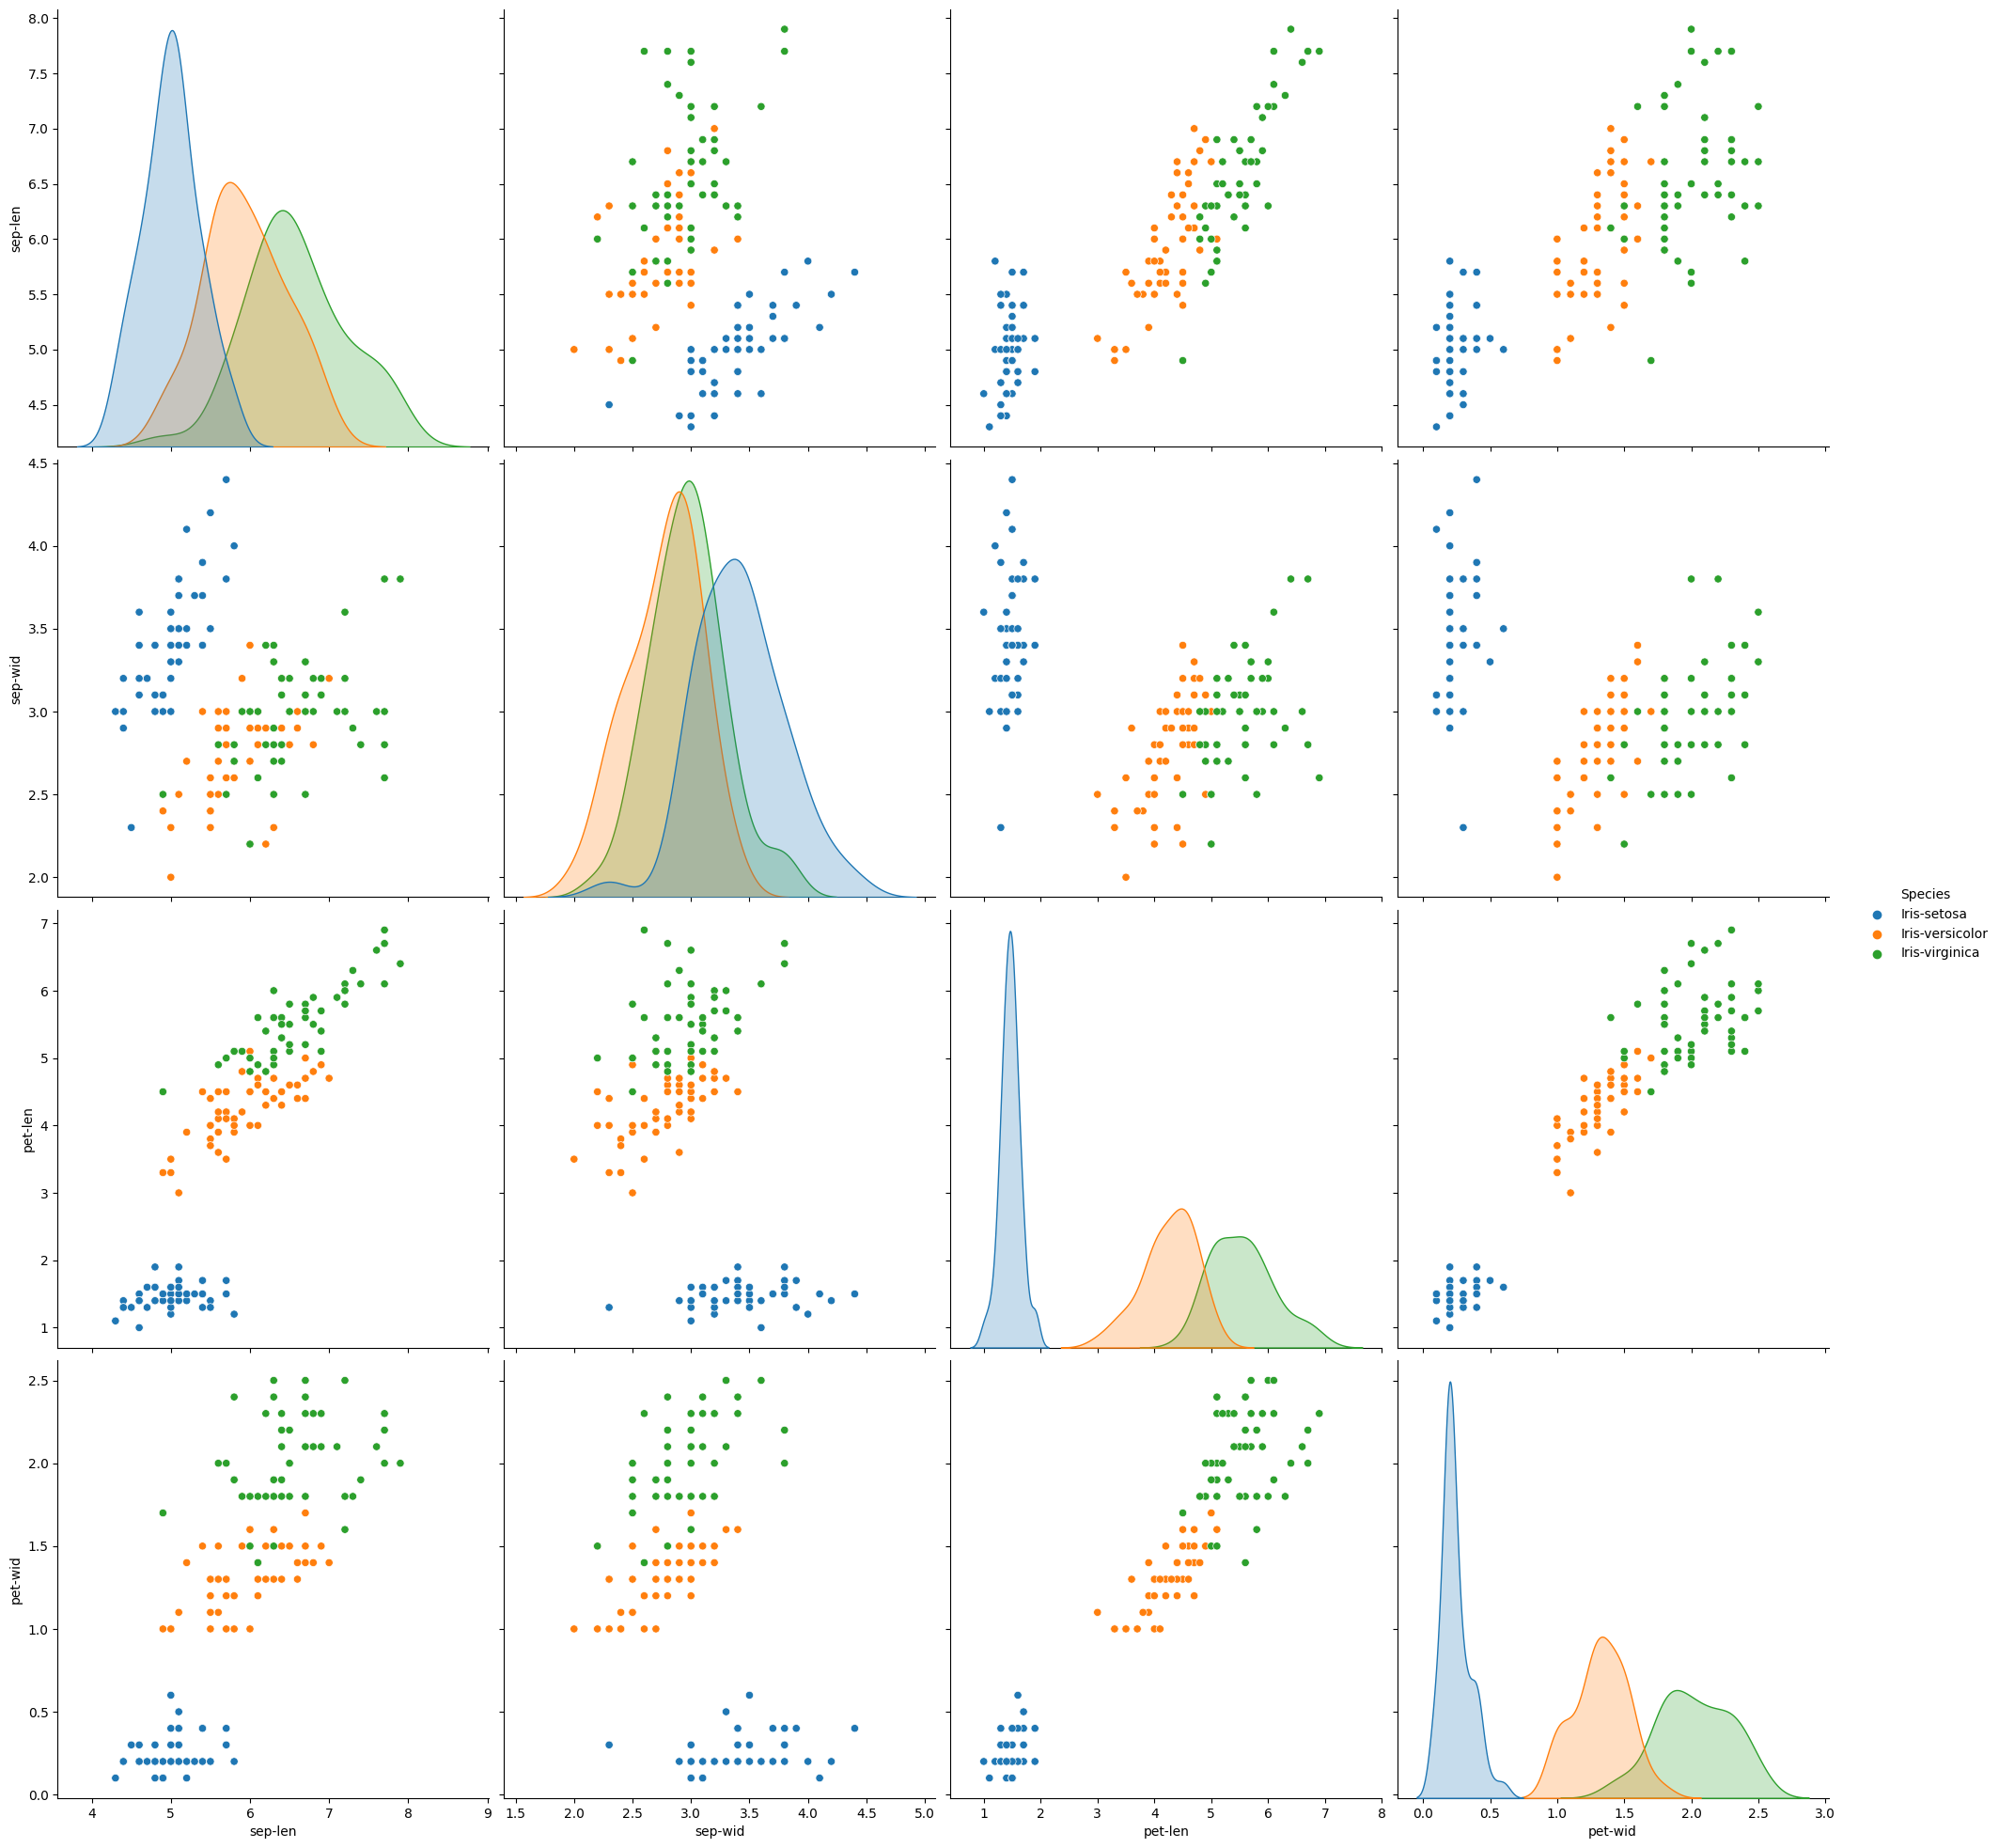

In [43]:
sns.pairplot(df, hue='Species', height = 5)

<AxesSubplot: >

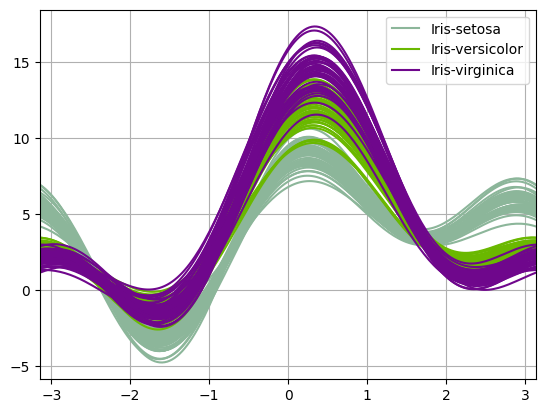

In [44]:
from pandas.plotting import andrews_curves
andrews_curves(df,'Species')

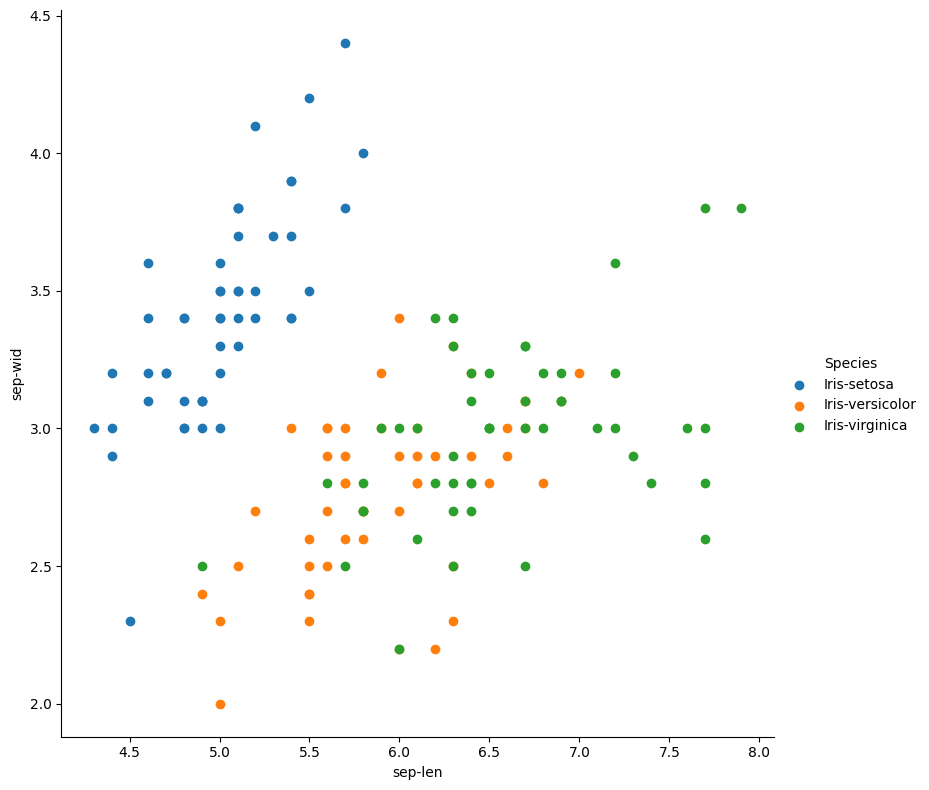

In [45]:
g = sns.FacetGrid(df, hue='Species', height=8)
g.map(plt.scatter, 'sep-len', 'sep-wid').add_legend()

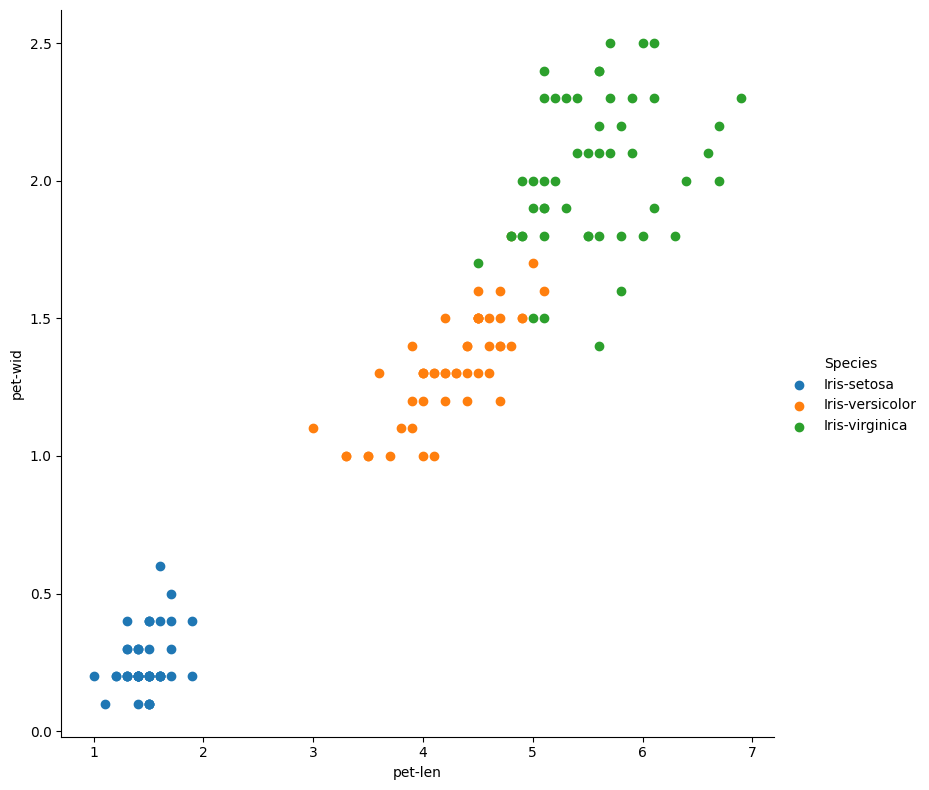

In [46]:
sns.FacetGrid(df, hue='Species',height=8).map(plt.scatter,'pet-len','pet-wid').add_legend()



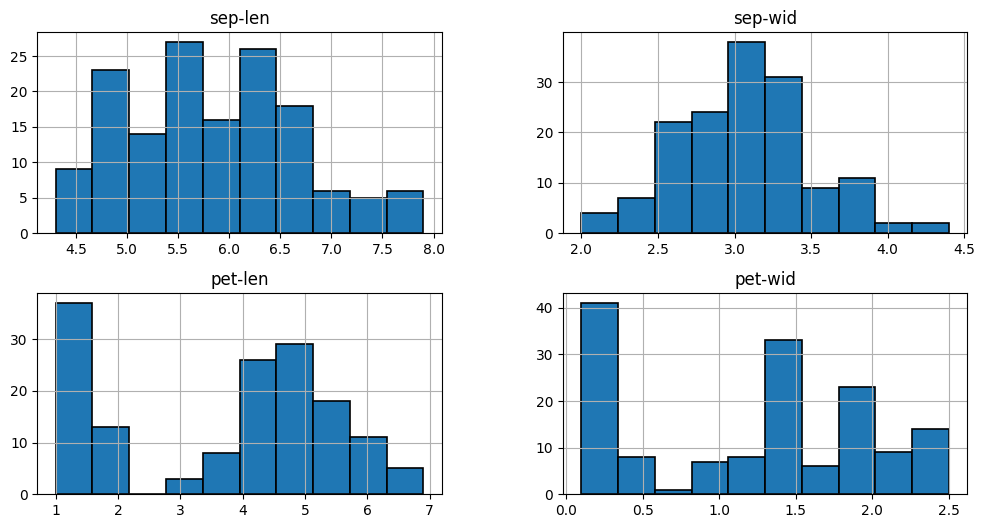

In [47]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)

# Correlation

In [48]:
df.corr()

,sep-len,sep-wid,pet-len,pet-wid
sep-len,1.000000,-0.109369,0.871754,0.817954
sep-wid,-0.109369,1.000000,-0.420516,-0.356544
pet-len,0.871754,-0.420516,1.000000,0.962757
pet-wid,0.817954,-0.356544,0.962757,1.000000


In [49]:
df.corr()['sep-len'].sort_values()

sep-wid   -0.109369
pet-wid    0.817954
pet-len    0.871754
sep-len    1.000000
Name: sep-len, dtype: float64

In [50]:
df.corr()['sep-wid'].sort_values()

pet-len   -0.420516
pet-wid   -0.356544
sep-len   -0.109369
sep-wid    1.000000
Name: sep-wid, dtype: float64

In [51]:
df.corr()['pet-len'].sort_values()

sep-wid   -0.420516
sep-len    0.871754
pet-wid    0.962757
pet-len    1.000000
Name: pet-len, dtype: float64

In [52]:
df.corr()['pet-wid'].sort_values()

sep-wid   -0.356544
sep-len    0.817954
pet-len    0.962757
pet-wid    1.000000
Name: pet-wid, dtype: float64

# Splitting the data into training and testing set

In [53]:
from sklearn.model_selection import train_test_split as tts
train,test = tts(df, test_size=0.2, random_state=20)

In [54]:
print(train.shape)

(120, 5)


In [55]:
print(test.shape)

(30, 5)


In [56]:
train_x = train[['sep-len','sep-wid','pet-len','pet-wid']]
train_x

,sep-len,sep-wid,pet-len,pet-wid
95,5.7,3.0,4.2,1.2
88,5.6,3.0,4.1,1.3
0,5.1,3.5,1.4,0.2
46,5.1,3.8,1.6,0.2
11,4.8,3.4,1.6,0.2
...,...,...,...,...
22,4.6,3.6,1.0,0.2
75,6.6,3.0,4.4,1.4
137,6.4,3.1,5.5,1.8
15,5.7,4.4,1.5,0.4


In [57]:
train_y = train.Species
train_y

95     Iris-versicolor
88     Iris-versicolor
0          Iris-setosa
46         Iris-setosa
11         Iris-setosa
            ...       
22         Iris-setosa
75     Iris-versicolor
137     Iris-virginica
15         Iris-setosa
99     Iris-versicolor
Name: Species, Length: 120, dtype: object

In [58]:
test_x = test[['sep-len','sep-wid','pet-len','pet-wid']]
test_y = test.Species

In [59]:
test_x

,sep-len,sep-wid,pet-len,pet-wid
47,4.6,3.2,1.4,0.2
73,6.1,2.8,4.7,1.2
74,6.4,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
67,5.8,2.7,4.1,1.0
89,5.5,2.5,4.0,1.3
143,6.8,3.2,5.9,2.3
21,5.1,3.7,1.5,0.4
108,6.7,2.5,5.8,1.8
12,4.8,3.0,1.4,0.1


In [60]:
test_y

47         Iris-setosa
73     Iris-versicolor
74     Iris-versicolor
129     Iris-virginica
67     Iris-versicolor
89     Iris-versicolor
143     Iris-virginica
21         Iris-setosa
108     Iris-virginica
12         Iris-setosa
147     Iris-virginica
76     Iris-versicolor
119     Iris-virginica
35         Iris-setosa
28         Iris-setosa
122     Iris-virginica
13         Iris-setosa
58     Iris-versicolor
114     Iris-virginica
57     Iris-versicolor
50     Iris-versicolor
149     Iris-virginica
111     Iris-virginica
20         Iris-setosa
72     Iris-versicolor
81     Iris-versicolor
98     Iris-versicolor
34         Iris-setosa
104     Iris-virginica
133     Iris-virginica
Name: Species, dtype: object

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()

In [63]:
model.fit(train_x,train_y)

LogisticRegression()

In [64]:
y_pred = model.predict(test_x)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_pred,test_y)*100

93.33333333333333

In [67]:
print(test_y)

47         Iris-setosa
73     Iris-versicolor
74     Iris-versicolor
129     Iris-virginica
67     Iris-versicolor
89     Iris-versicolor
143     Iris-virginica
21         Iris-setosa
108     Iris-virginica
12         Iris-setosa
147     Iris-virginica
76     Iris-versicolor
119     Iris-virginica
35         Iris-setosa
28         Iris-setosa
122     Iris-virginica
13         Iris-setosa
58     Iris-versicolor
114     Iris-virginica
57     Iris-versicolor
50     Iris-versicolor
149     Iris-virginica
111     Iris-virginica
20         Iris-setosa
72     Iris-versicolor
81     Iris-versicolor
98     Iris-versicolor
34         Iris-setosa
104     Iris-virginica
133     Iris-virginica
Name: Species, dtype: object


In [82]:
comp_df = pd.DataFrame()
comp_df['Actual Species'] = test_y
comp_df['Predicted Species'] = y_pred
# Define a lambda function that compares the values of the 'Actual Species' and 'Predicted Species' columns
# and returns 0 if they are equal, and 1 if they are not equal
compare_func = lambda row: 0 if row['Actual Species'] == row['Predicted Species'] else 1
# Apply the lambda function to the 'remark' column
comp_df['remark'] = comp_df.apply(compare_func, axis = 1)
comp_df['remark'].sum()

2

In [ ]:
comp_df.head(50)

,Actual Species,Predicted Species
47,Iris-setosa,Iris-setosa
73,Iris-versicolor,Iris-versicolor
74,Iris-versicolor,Iris-versicolor
129,Iris-virginica,Iris-virginica
67,Iris-versicolor,Iris-versicolor
89,Iris-versicolor,Iris-versicolor
143,Iris-virginica,Iris-virginica
21,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa


# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
model = DecisionTreeClassifier()

In [85]:
model.fit(train_x,train_y)

DecisionTreeClassifier()

In [86]:
y_pred = model.predict(test_x)

In [ ]:
accuracy_score(y_pred,test_y)*100

93.33333333333333

In [91]:
comp_df = pd.DataFrame()
comp_df['Actual Species']=test_y
comp_df['Predicted Species']=y_pred
comp_df['remark'] = comp_df.apply(lambda row : 0 if (row['Actual Species'] == row['Predicted Species']) else 1, axis = 1)
'''The row parameter is a Series object representing a row in the DataFrame. The comparison row['Actual Species'] == row['Predicted Species'] 
returns a Series object with a boolean value for each row.'''
comp_df['remark'].sum()

2

In [88]:
comp_df.head(15)

,Actual Species,Predicted Species
47,Iris-setosa,Iris-setosa
73,Iris-versicolor,Iris-versicolor
74,Iris-versicolor,Iris-versicolor
129,Iris-virginica,Iris-virginica
67,Iris-versicolor,Iris-versicolor
89,Iris-versicolor,Iris-versicolor
143,Iris-virginica,Iris-virginica
21,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa


# Support Vector Machine

In [92]:
from sklearn.svm import SVC

In [93]:
model = SVC()

In [94]:
model.fit(train_x,train_y)

SVC()

In [95]:
y_pred = model.predict(test_x)

In [96]:
accuracy_score(y_pred,test_y)*100

100.0

In [97]:
comp_df = pd.DataFrame()
comp_df['Actual Species']=test_y
comp_df['Predicted Species']=y_pred

In [98]:
comp_df.head(30)

,Actual Species,Predicted Species
47,Iris-setosa,Iris-setosa
73,Iris-versicolor,Iris-versicolor
74,Iris-versicolor,Iris-versicolor
129,Iris-virginica,Iris-virginica
67,Iris-versicolor,Iris-versicolor
89,Iris-versicolor,Iris-versicolor
143,Iris-virginica,Iris-virginica
21,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa


# KNearestNeighbors

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
model = KNeighborsClassifier()

In [101]:
model.fit(train_x,train_y)

KNeighborsClassifier()

In [102]:
y_pred = model.predict(test_x)

In [103]:
result  = accuracy_score(y_pred, test_y)*100
result

96.66666666666667

In [107]:
comp_df = pd.DataFrame()
comp_df['Actual values'] = test_y
comp_df['Predicted values'] = y_pred
comp_df['remark'] = comp_df.apply(lambda row : 0 if (row['Actual values'] == row['Predicted values']) else 1, axis = 1)
comp_df['remark'].sum()

1

# Creating Petals and Sepals Training data

In [108]:
sepal=df[['sep-len','sep-wid','Species']]
petal=df[['pet-len','pet-wid','Species']]

In [109]:
#For iris sepal
train_s,test_s = tts(sepal,test_size=0.3,random_state=20)

In [110]:
train_x_s = train_s[['sep-len','sep-wid']]
test_x_s = test_s[['sep-len','sep-wid']]
test_x_s.shape

(45, 2)

In [111]:
train_y_s = train_s.Species
test_y_s = test_s.Species
test_y_s.shape

(45,)

In [112]:
#For iris petal
train_p,test_p = tts(petal, test_size=0.3, random_state=20)

In [113]:
train_x_p = train_p[['pet-len','pet-wid']]
test_x_p = test_p[['pet-len','pet-wid']]
test_x_p.shape

(45, 2)

In [114]:
train_y_p = train_p.Species
test_y_p = test_p.Species
test_y_p.shape

(45,)

# Logistic Regression

In [115]:
model = LogisticRegression()

In [116]:
model.fit(train_x_s,train_y_s)

LogisticRegression()

In [117]:
prediction = model.predict(test_x_s)
print('The accuracy of the Logistic Regression using seplas is: ',accuracy_score(prediction,test_y_s)*100)

The accuracy of the Logistic Regression using seplas is:  71.11111111111111


In [118]:
comp_df_sep = pd.DataFrame()
comp_df_sep['Actual Species'] = test_y_s
comp_df_sep['Predicted Species'] = prediction
comp_df_sep.head(15)

,Actual Species,Predicted Species
47,Iris-setosa,Iris-setosa
73,Iris-versicolor,Iris-versicolor
74,Iris-versicolor,Iris-virginica
129,Iris-virginica,Iris-virginica
67,Iris-versicolor,Iris-versicolor
89,Iris-versicolor,Iris-versicolor
143,Iris-virginica,Iris-virginica
21,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa


In [119]:
model.fit(train_x_p,train_y_p)

LogisticRegression()

In [120]:
prediction = model.predict(test_x_p)
print('The accuracy of the Logistic Regression using petals is: ',accuracy_score(prediction,test_y_p)*100)

The accuracy of the Logistic Regression using petals is:  93.33333333333333


In [121]:
comp_df_pet = pd.DataFrame()
comp_df_pet['Actual Species'] = test_y_p
comp_df_pet['Predicted Species'] = prediction
comp_df_pet.head(15)

,Actual Species,Predicted Species
47,Iris-setosa,Iris-setosa
73,Iris-versicolor,Iris-versicolor
74,Iris-versicolor,Iris-versicolor
129,Iris-virginica,Iris-virginica
67,Iris-versicolor,Iris-versicolor
89,Iris-versicolor,Iris-versicolor
143,Iris-virginica,Iris-virginica
21,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa


# Decision Tree

In [122]:
model = DecisionTreeClassifier()

In [123]:
model.fit(train_x_s,train_y_s)

DecisionTreeClassifier()

In [124]:
prediction = model.predict(test_x_s)
print('The accuracy of the Decision Tree using sepals is: ',accuracy_score(prediction,test_y_s)*100)

The accuracy of the Decision Tree using sepals is:  71.11111111111111


In [125]:
comp_df_sep = pd.DataFrame()
comp_df_sep['Actual Species'] = test_y_s
comp_df_sep['Predicted Species'] = prediction
comp_df_sep.head(15)

,Actual Species,Predicted Species
47,Iris-setosa,Iris-setosa
73,Iris-versicolor,Iris-versicolor
74,Iris-versicolor,Iris-virginica
129,Iris-virginica,Iris-virginica
67,Iris-versicolor,Iris-virginica
89,Iris-versicolor,Iris-versicolor
143,Iris-virginica,Iris-virginica
21,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-versicolor
12,Iris-setosa,Iris-setosa


In [ ]:
model.fit(train_x_p,train_y_p)

DecisionTreeClassifier()

In [128]:
comp_df_pet = pd.DataFrame()
comp_df_pet['Actual Species'] = test_y_p
comp_df_pet['Predicted Species'] = prediction
comp_df_pet.head(15)

,Actual Species,Predicted Species
47,Iris-setosa,Iris-setosa
73,Iris-versicolor,Iris-versicolor
74,Iris-versicolor,Iris-virginica
129,Iris-virginica,Iris-virginica
67,Iris-versicolor,Iris-virginica
89,Iris-versicolor,Iris-versicolor
143,Iris-virginica,Iris-virginica
21,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-versicolor
12,Iris-setosa,Iris-setosa


# K-Nearest Neighbors

In [131]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [132]:
model.fit(train_x_s,train_y_s)

KNeighborsClassifier()

In [133]:
prediction = model.predict(test_x_s)
print('The accuracy of the KNN using sepals is : ',accuracy_score(prediction,test_y_s)*100)

The accuracy of the KNN using sepals is :  75.55555555555556


In [134]:
comp_df_sep = pd.DataFrame()
comp_df_sep['Actual Species'] = test_y_s
comp_df_sep['Predicted Species'] = prediction
comp_df_sep.head(15)

,Actual Species,Predicted Species
47,Iris-setosa,Iris-setosa
73,Iris-versicolor,Iris-versicolor
74,Iris-versicolor,Iris-virginica
129,Iris-virginica,Iris-virginica
67,Iris-versicolor,Iris-versicolor
89,Iris-versicolor,Iris-versicolor
143,Iris-virginica,Iris-virginica
21,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa


In [ ]:
model.fit(train_x_p,train_y_p)

KNeighborsClassifier()

In [136]:
comp_df_pet = pd.DataFrame()
comp_df_pet['Actual Species'] = test_y_p
comp_df_pet['Predicted Species'] = prediction
comp_df_pet.head(15)

,Actual Species,Predicted Species
47,Iris-setosa,Iris-setosa
73,Iris-versicolor,Iris-versicolor
74,Iris-versicolor,Iris-virginica
129,Iris-virginica,Iris-virginica
67,Iris-versicolor,Iris-versicolor
89,Iris-versicolor,Iris-versicolor
143,Iris-virginica,Iris-virginica
21,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa


# Support Vector Machine

In [137]:
model = SVC()

In [138]:
model.fit(train_x_s,train_y_s)

SVC()

In [139]:
prediction = model.predict(test_x_s)
print('The accuracy of SVM using sepals is : ',accuracy_score(prediction,test_y_s)*100)

The accuracy of SVM using sepals is :  71.11111111111111


In [140]:
comp_df_sep = pd.DataFrame()
comp_df_sep['Actual Species'] = test_y_s
comp_df_sep['Predicted Species'] = prediction
comp_df_sep.head(15)

,Actual Species,Predicted Species
47,Iris-setosa,Iris-setosa
73,Iris-versicolor,Iris-versicolor
74,Iris-versicolor,Iris-virginica
129,Iris-virginica,Iris-virginica
67,Iris-versicolor,Iris-versicolor
89,Iris-versicolor,Iris-versicolor
143,Iris-virginica,Iris-virginica
21,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa


In [ ]:
model.fit(train_x_p,train_y_p)

SVC()

In [142]:
comp_df_pet = pd.DataFrame()
comp_df_pet['Actual Species'] = test_y_p
comp_df_pet['Predicted Species'] = prediction
comp_df_pet.head(15)

,Actual Species,Predicted Species
47,Iris-setosa,Iris-setosa
73,Iris-versicolor,Iris-versicolor
74,Iris-versicolor,Iris-virginica
129,Iris-virginica,Iris-virginica
67,Iris-versicolor,Iris-versicolor
89,Iris-versicolor,Iris-versicolor
143,Iris-virginica,Iris-virginica
21,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa
